# SyriaTel Customer Churn Prediction

# 1. Business Understanding

## Problem Statement

SyriaTel, a telecommunications company, is facing a high churn rate, with many customers discontinuing their services and switching to competitors. The company wants to address this issue by developing a customer churn prediction model. By analyzing the dataset, SyriaTel aims to gain insights into factors associated with churn, with the goal of reducing churn rate, increasing customer retention, and improving overall profitability.

## Specific Objectives
1. Identify the factors that are most likely to lead to customer churn.
2. Develop a model that can accurately predict which customers are at risk of churning.
3. Take proactive steps to retain customers who are at risk of churning.

## Success Metrics
The success criteria for this project include:

1. Developing a robust churn prediction model with high recall score of 0.8
2. Identifying the key features and factors that significantly contribute to customer churn.
3. Providing actionable insights and recommendations to the telecom company for reducing churn and improving customer retention.
4. Demonstrating the value of churn prediction models in enabling proactive retention strategies and reducing revenue losses due to customer churn.

## Data Understanding
The dataset provided information on the following features for each customer:
* US State
* Length of account
* Area code + phone numbers
* If the customer has an international plan
* If the customer has a voicemail plan
* No. of voicemail messages
* Breakdown of call minutes for day, evening, night, and international
* Breakdown of call charges for day, evening, night, and international
* Breakdown of no. of calls for day, evening, night, and international
* No. of calls to customer service
* If they have churned

# DATA PREPARATION

## Import necessary packages

In [408]:
# Import modules & packages

# Data manipulation 
import pandas as pd 
import numpy as np 

# Data visualization
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.graph_objs as go
import plotly.express as px

# Modeling
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV 
from imblearn.over_sampling import SMOTE,SMOTENC
from sklearn.metrics import f1_score,recall_score,precision_score,confusion_matrix,roc_curve,roc_auc_score,classification_report # performance metrics
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Algorithms for supervised learning methods
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from xgboost import XGBClassifier

# Filtering future warnings
import warnings
warnings.filterwarnings('ignore')

## Loading the data

In [409]:
df=pd.read_csv('bigml_59c28831336c6604c800002a.csv')

## Data cleaning 

### Summarize data

In [410]:
#reading the data
df.head(10)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [411]:
#Shape of the data
print ('Shape of the given dataset is a two dimensional data set {}.Contains {} rows and {} columns'.format(df.shape,df.shape[0],df.shape[1]))

Shape of the given dataset is a two dimensional data set (3333, 21).Contains 3333 rows and 21 columns


#### Feature names and the datatypes.

In [412]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

Upon thorough examination of the dataset, it is confirmed that there are no missing values present. Each variable across all observations has a complete entry, for better understanding, the variables are stated and explained in the data dictionary below;


### Data Dictionary
|Variable| Description|
|:----------|:-------------------------|
| state | State customer belongs to |
|account length | The duration of the account with company|
|area code |   Area in the state customer belongs to |      
|phone number  | Customer’s mobile number (Unique attribute)| 
|international plan | Plan recharged by customer for international calls |
|voice mail plan | Plan recharged by customer for voice mails messages|  
|number vmail messages |Voice mail messages by customer during the period|
|total day minutes  |Minutes used by customer in day calls|
|total day calls |Call made by customer in day during the period| 
|total day charge | Customer’s day call charges|
|total eve minutes | Minutes used by customer in evening calls |
|total eve calls   |Call made by customer in evening during the period |
|total eve charge  |Customer’s evening call charges|
|total night minutes |Minutes used by customer in night calls|
|total night calls |Call made by customer in night during the period| 
|total night charge |Customer’s night call charges|
|total intl minutes |Minutes used by customer in international calls|
|total intl calls  |International Call made by customer during the period |
|total intl charge  |Customer’s international call charges|
|customer service calls|Calls made by customer-tocustomer service  |
|churn|Dependent variable, shows customer has churned or not|

#### Missing values

<Axes: >

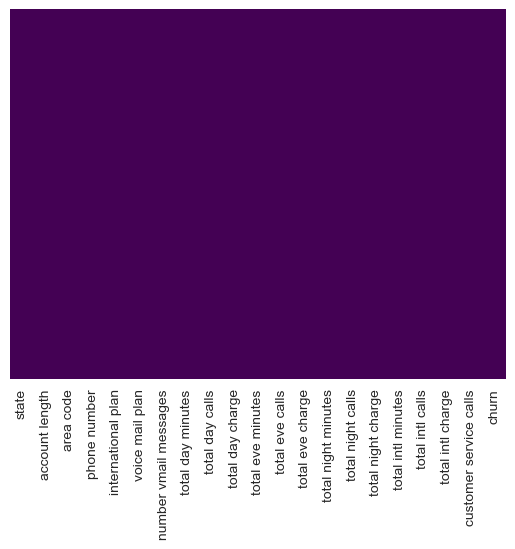

In [413]:
#Using heatmap to confirm no missing values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

As displayed by the heatmap above there are no missing values.

In [414]:
# Selecting column names according to datatypes
print(df.columns.to_series().groupby(df.dtypes).groups)

{bool: ['churn'], int64: ['account length', 'area code', 'number vmail messages', 'total day calls', 'total eve calls', 'total night calls', 'total intl calls', 'customer service calls'], float64: ['total day minutes', 'total day charge', 'total eve minutes', 'total eve charge', 'total night minutes', 'total night charge', 'total intl minutes', 'total intl charge'], object: ['state', 'phone number', 'international plan', 'voice mail plan']}


From the output above, we can see that the data types are grouped as below;
|Data type|Variables|
|:--------|:---------|
|bool|Churn|,
|int64|'account length', 'area code', 'number vmail messages', 'total day calls', 'total eve calls', 'total night calls', 'total intl calls', 'customer service calls'|
|float64|'total day minutes', 'total day charge', 'total eve minutes', 'total eve charge', 'total night minutes', 'total night charge', 'total intl minutes', 'total intl charge'|
|object|'state', 'phone number', 'international plan', 'voice mail plan'|

State is in object datatype, it is a categorical variable and will change it to int64.
Phone number is in object datatype but also a unique identifier so changing is not necessary.
International plan and voice mail plan will be changed to int64 datatype.

In [415]:
# Check for duplicate columns
duplicate_columns = df.columns[df.columns.duplicated()]

# Count the number of duplicate columns
num_duplicate_columns = len(duplicate_columns)

# Print the result
print(f'Number of duplicate columns: {num_duplicate_columns}')


Number of duplicate columns: 0


# Exploratory Data Analysis

This section involves exploring and understanding the dataset to uncover patterns, identify relationships between variables, detect outliers, and gain insights into the data before applying any modeling or statistical techniques.

## Data Spliting

Select and separately store Numerical and Categorical features in different variables.

In [416]:
#Selecting numerical features
numerical_data = df.select_dtypes(include='number')
#append the features of numerical_data to list
numerical_features=numerical_data.columns.tolist()

print(f'There are {len(numerical_features)} numerical features:', '\n')
print(numerical_features)


There are 16 numerical features: 

['account length', 'area code', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls']


In [417]:
#Selecting categoricalfeatures
categorical_data=df.select_dtypes(include= 'object')
#append the features of categorical_data to list
categorical_features=categorical_data.columns.tolist()

print(f'There are {len(categorical_features)} categorical features:', '\n')
print(categorical_features)

There are 4 categorical features: 

['state', 'phone number', 'international plan', 'voice mail plan']


## Descriptive analysis

In descriptive Analysis I analyze each variable separately to get inference about the feature.

### Summary satistics of Numerical Features

In [418]:
#Summary satistics of Numerical Features
numerical_data.describe().T

,count,mean,std,min,25%,50%,75%,max
account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


Above table show basic statistics like mean, quantiles, Standard deviation about each numerical features.
These numbers are hard to interpret in this format, so we create some graphs which visualize them in a better way. First, we look at the distribution of the our target variable:

### Summary satistics of Categorical features

In [419]:
#Summary satistics of Categorical features
categorical_data.describe(include='object').T

,count,unique,top,freq
state,3333,51,WV,106
phone number,3333,3333,382-4657,1
international plan,3333,2,no,3010
voice mail plan,3333,2,no,2411


In [420]:
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

### Variance of each numerical features

In [421]:
numerical_data.var()

account length            1585.800121
area code                 1795.326257
number vmail messages      187.371347
total day minutes         2966.696487
total day calls            402.768141
total day charge            85.737128
total eve minutes         2571.894016
total eve calls            396.910999
total eve charge            18.581856
total night minutes       2557.714002
total night calls          382.930472
total night charge           5.179597
total intl minutes           7.794368
total intl calls             6.057576
total intl charge            0.568173
customer service calls       1.730517
dtype: float64

### Skew of each numerical features

In [422]:
numerical_data.skew()

account length            0.096606
area code                 1.126823
number vmail messages     1.264824
total day minutes        -0.029077
total day calls          -0.111787
total day charge         -0.029083
total eve minutes        -0.023877
total eve calls          -0.055563
total eve charge         -0.023858
total night minutes       0.008921
total night calls         0.032500
total night charge        0.008886
total intl minutes       -0.245136
total intl calls          1.321478
total intl charge        -0.245287
customer service calls    1.091359
dtype: float64

### Distribution of the numerical features

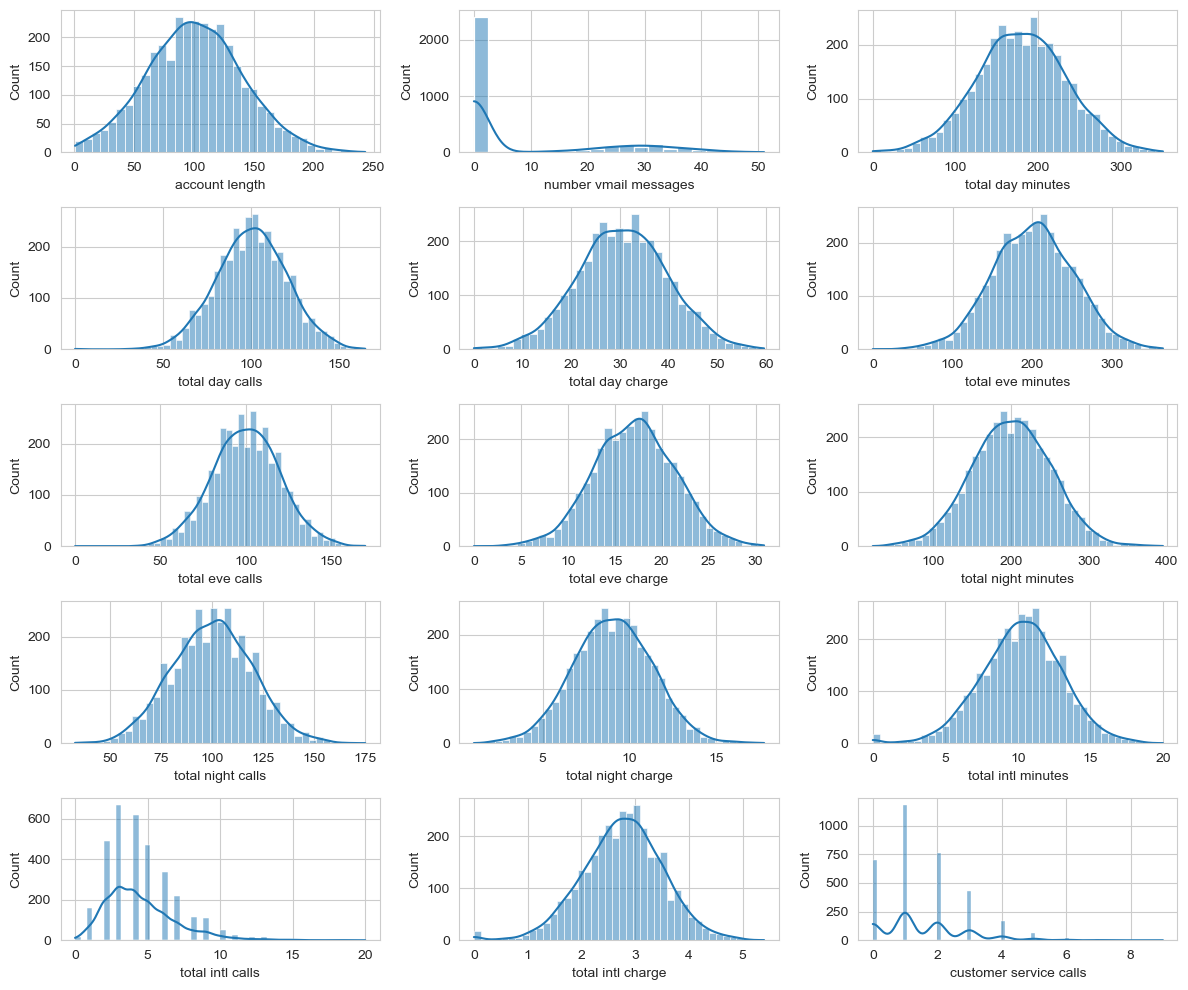

In [423]:
#checking for distribution of the numeric features
numeric_features = ['account length', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge',
'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls',
'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls']

# Calculate the number of rows and columns for subplots
nrows = (len(numeric_features) - 1) // 3 + 1
ncols = min(3, len(numeric_features))

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 10))

# Flatten axes if necessary
axes = axes.flatten() if nrows > 1 else [axes]

# Plot numeric features
for i, feature in enumerate(numeric_features):
    ax = axes[i]
    sns.histplot(df[feature], kde=True, ax=ax)
    ax.set_xlabel(feature)
    ax.set_ylabel("Count")

# Remove empty subplots
if len(numeric_features) < nrows * ncols:
    for i in range(len(numeric_features), nrows * ncols):
        fig.delaxes(axes[i])

# Adjust subplot spacing
fig.tight_layout()

# Display the plot
plt.show()

### Observation
For the distribution plots of the features above, all of them except customer service calls and number of voicemail messages have a normal distribution. Total international calls seems to be skewed to the right side however it is still normally distributed. Customer service calls has a few peaks, which indicates there are a few modes in the population.

### Distribution of the categorical features

There are 3 categorical Columns in the dataset that we shall be analysing: state,international plan and voice mail plan.

In [424]:
#Checking the distribution of categorical features
def plot_categorical_distribution(data, feature):
    """
    Plots the distribution of a categorical feature in the given data.
    """
    plt.figure(figsize=(14, 5))
    sns.countplot(x=feature, data=categorical_data,color='lightblue', order=data[feature].value_counts().index)
    plt.xticks(rotation=90)
    plt.show()
    
    

#### State

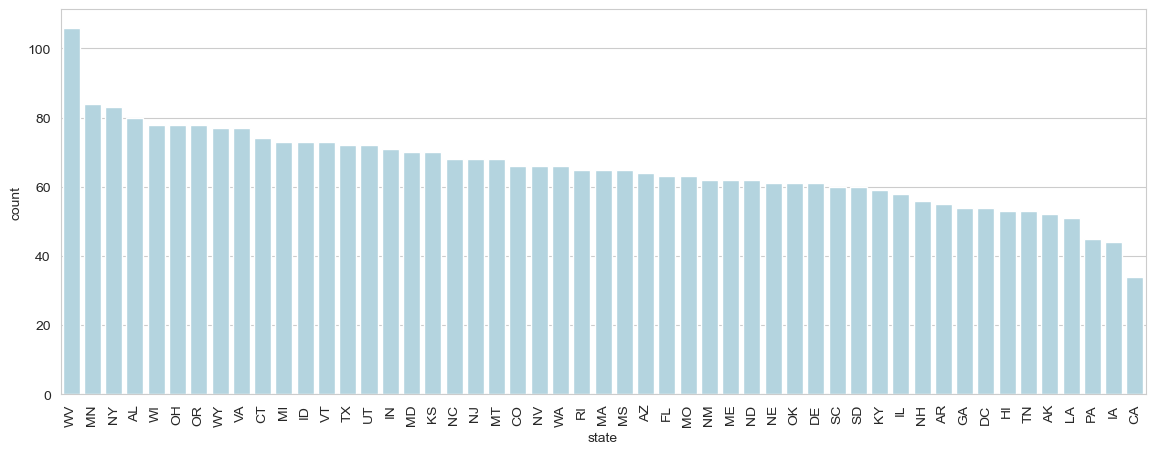

In [425]:
plot_categorical_distribution(categorical_data, 'state')

Most of the customers are from West Virginia,Minnesota,NewYork,Alabama and Wisconsin.

#### International plan

In [426]:
categorical_data['international plan'].value_counts()

no     3010
yes     323
Name: international plan, dtype: int64

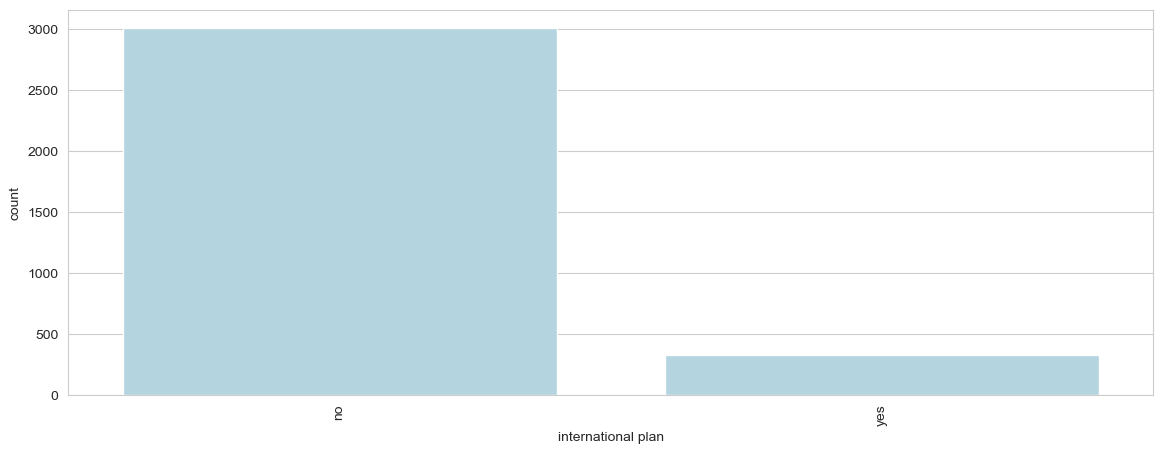

In [427]:
plot_categorical_distribution(categorical_data,'international plan')

Out of 3333 customers, only 323 of them have an international plan, that's about 0.1%.

#### Voicemail plan

In [428]:
categorical_data['voice mail plan'].value_counts()

no     2411
yes     922
Name: voice mail plan, dtype: int64

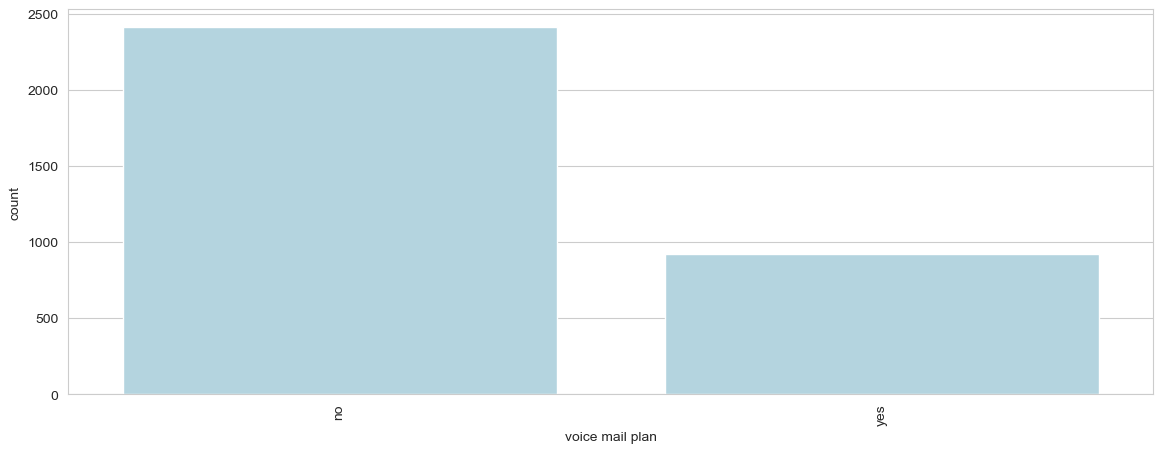

In [429]:
plot_categorical_distribution(categorical_data, 'voice mail plan')

Out of 3333 customers, only 922 customers have a voicemail plan, that's about 0.3%.

## Correlation Analysis

### Correlation Heatmap plot of whole dataset

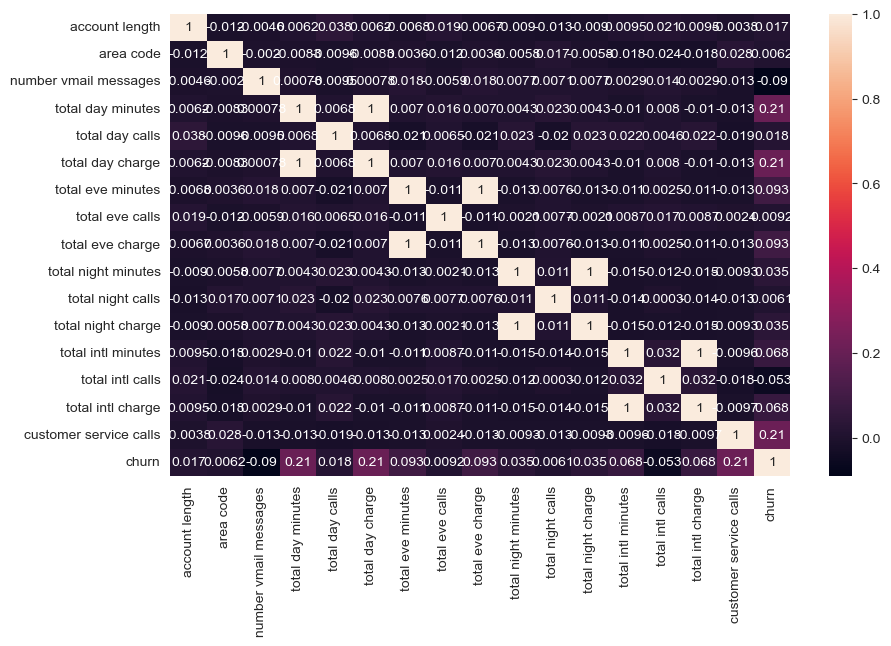

In [430]:
# Plot correlation matrix in heatmap
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(df.corr(), ax=ax, annot=True)
plt.show()

##### Observation
Most of the features are not correlated however some do share a perfect correlation.

* Total day charge and total day minutes features are fully positively correlated.
* Total eve charge and total eve minutes features are fully positively correlated.
* Total night charge and total night minutes features are fully positively correlated.
* Total int charge and total int minutes features are fully positively correlated.
It makes sense for these features to be perfectly correlated because the charge is a direct result of the minutes used.

## Generating correlation plot between features and target variable using different method
### Correlation plot between numerical features and target

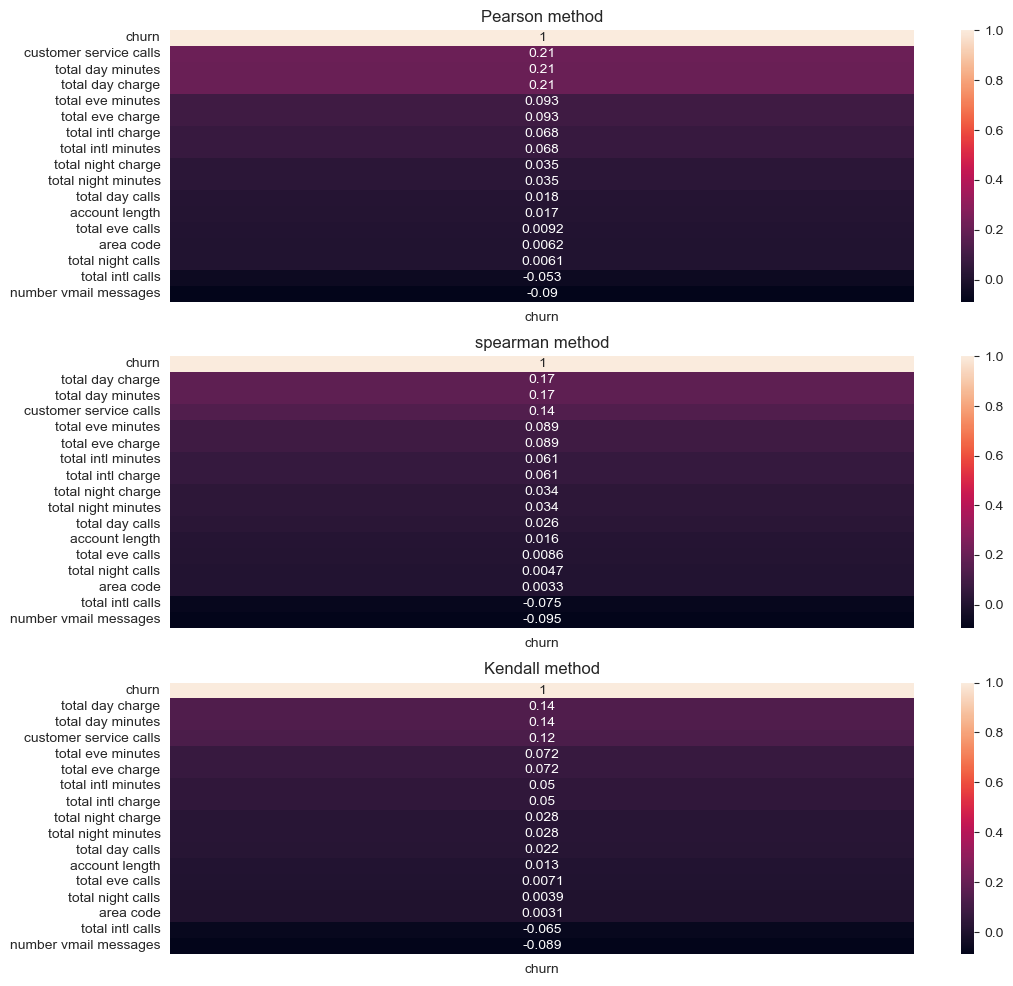

In [431]:
fig, ax = plt.subplots(3,1, figsize=(12, 12))
## Correlation coefficient using different methods
corr1 = df.corr('pearson')[['churn']].sort_values(by='churn', ascending=False)
corr2 = df.corr('spearman')[['churn']].sort_values(by='churn', ascending=False)
corr3 = df.corr('kendall')[['churn']].sort_values(by='churn', ascending=False)

#setting titles for each plot
ax[0].set_title('Pearson method')
ax[1].set_title('spearman method')
ax[2].set_title('Kendall method')
## Generating heatmaps of each methods
sns.heatmap(corr1, ax=ax[0], annot=True)
sns.heatmap(corr2, ax=ax[1], annot=True)
sns.heatmap(corr3, ax=ax[2], annot=True)

plt.show()

##### Observation
From above plots  is evident that all numerical features shows only little correlation with target variable, with total init calls and number of vmail messanges having weak negative correlation and all the others show weak positive correlation with the target variable.

## Check imbalance in the data

#### We have classification problem so we need to check the balance of the given data.

In [432]:
#check Imbalance in data

#group instances based on the classes in churn variable
class_counts=df.groupby("churn").size()

columns=['churn','count','percentage']
outcome=[0,1]
count=list()
percentage=list()

#Calculate the percentage of each value of the churn variable from total
for val in range(2):
    count.append(class_counts[val])
    percent=(class_counts[val]/3333)*100
    percentage.append(percent)

# Convert the calulated values into a dataframe

imbalance_df=pd.DataFrame(list(zip(outcome,count,percentage)),columns=columns)
imbalance_df   

,churn,count,percentage
0,0,2850,85.508551
1,1,483,14.491449


Of the 3,333 customers in the dataset, 483 have terminated their contract. That is 14.5% of customers lost. The distribution of the binary classes shows a data imbalance. This needs to be addressed before modeling as an unbalanced feature can cause the model to make false predictions.

#### Barplot of Outcome vs Percentage

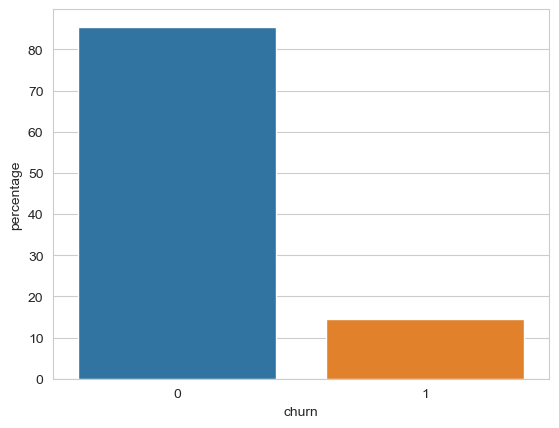

In [433]:
sns.barplot(data=imbalance_df,x=imbalance_df['churn'],y=imbalance_df['percentage'])
plt.show()


#### Observation
* There is imbalance between two classes (approx 71% difference).So I consider adapting performance metrics like "recall", "precision" and "f1 score" instead of "accurary" to assess the ML model. Also check if the imbalance data affecting the performance of the machine learning model

## SUMMARY OF EDA


Performed various exploratory data analysis techniques such as correlation, visualization on the given features in the dataset also found imbalance in the given dataset. From the insights acquired through the analysis I will make better decisions when I do Machine learning model development.

## Dealing with Outliers

Outliers can disproportionately impact the performance of predictive models by introducing noise or skewing the training process. By excluding outliers beyond 3 standard deviations, we improve our models' ability to generalize patterns and make more accurate predictions on unseen data.

In [434]:
def drop_numerical_outliers(df, z_thresh=3):
    constrains = df.select_dtypes(include=[np.number]).apply(lambda x: np.abs(stats.zscore(x)) < z_thresh) \
        .all(axis=1)
    df.drop(df.index[~constrains], inplace=True)
    
drop_numerical_outliers(df)
print(df.shape)

(3169, 21)


## Feature Engineering
The process of transforming raw data into features that better represent the underlying problem to the predictive models, resulting in improved model accuracy on unseen data. In this phase, we'll perform Label Encoding, One Hot Encoding and Scaling the data.

## Handle Categorical Columns - Label Encoding.
It is a technique used to convert categorical variables into numerical values. This is done by assigning a unique integer to each category.

In [435]:
# Convert columns with 'yes' or 'no' to binary using LabelEncoder
label_encoder = LabelEncoder()
df['churn'] = label_encoder.fit_transform(df['churn'])

### One Hot Encoding
This is a technique used to convert categorical variables into a set of binary features. This is done by creating a new feature for each category, and then assigning a value of 1 to the feature if the category is present and 0 if it is not.

In [436]:
df = pd.get_dummies(df,columns = ['state', 'area code','international plan','voice mail plan'])
df.head()

,account length,phone number,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,...,state_WI,state_WV,state_WY,area code_408,area code_415,area code_510,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
0,128,382-4657,25,265.1,110,45.07,197.4,99,16.78,244.7,...,0,0,0,0,1,0,1,0,0,1
1,107,371-7191,26,161.6,123,27.47,195.5,103,16.62,254.4,...,0,0,0,0,1,0,1,0,0,1
2,137,358-1921,0,243.4,114,41.38,121.2,110,10.30,162.6,...,0,0,0,0,1,0,1,0,1,0
3,84,375-9999,0,299.4,71,50.90,61.9,88,5.26,196.9,...,0,0,0,1,0,0,0,1,1,0
4,75,330-6626,0,166.7,113,28.34,148.3,122,12.61,186.9,...,0,0,0,0,1,0,0,1,1,0


The dataset has one Unique attribute that is “phone number”. They are not used in the training process because they have a direct correlation with the target output hence we drop it. Hence we drop the column.

In [437]:
df=df.drop(['phone number'],axis=1)

# MODELING

Here, I will build a model that can predict the customer churn based on the features in our dataset. The model will be evaluated on the recall score. Specifically, if it achieves an recall score of 80% or higher, it will be considered a success.

In order to achieve the targets stipulated in the project proposal, we will be using the following algorithms:

1. Logistic Regression
2. Decision Tree
3. Random Forest
4. XG Boost
We will also be using the ROC_AUCmetric to evaluate the performance of our models

To deal with class imbalance, we will be using SMOTE to generate synthetic examples of the minority class in our dataset

In [438]:
#splits our data set to features and the target "churn"
X = df.drop(["churn"], axis = 1)
y= df["churn"]

## Train-Test Split
Splitting data into train and test sets using a test_size of 0.25

In [439]:
#splitting the data in to train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=123)

## Applying SMOTE to Resolve Unbalanced 'churn' Feature


Synthetic Minority Oversampling Technique ("SMOTE") is an oversampling technique where synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling. It focuses on the feature space to generate new instances with the help of interpolation between the positive instances that lie together. The technique aims to balance class distribution by randomly increasing minority class examples by replicating them.

In [440]:
#instantiate SMOTENC
from imblearn.over_sampling import SMOTE, SMOTENC

smote = SMOTENC(categorical_features = [1,2],random_state = 123)
resampled_X_train, resampled_y_train = smote.fit_resample(X_train,y_train)

## Logistic Regression
Logistic regression is a statistical model used for binary classification tasks. It is a type of regression analysis where the dependent variable is binary. The goal of logistic regression is to estimate the probability of an instance belonging to a specific class based on the values of the independent variables.

In [441]:
#instantiate the logistic regression
logreg = LogisticRegression(random_state=123)

In [442]:
# Fit the model on the training data 
logreg.fit(resampled_X_train, resampled_y_train)
#predict on the labels of test set
y_pred_log = logreg.predict(X_test)

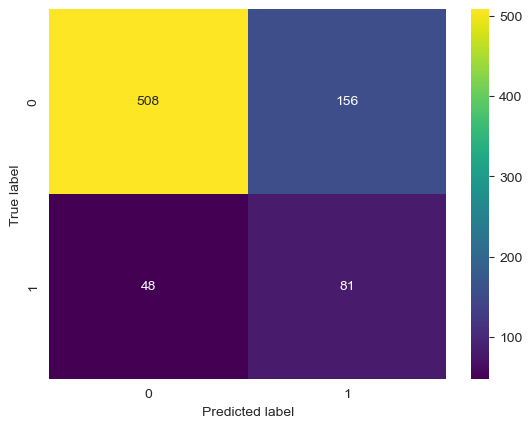

In [443]:
# plot a confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()
plot_confusion_matrix(y_test, y_pred_log, [0,1])

In [444]:
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

           0       0.91      0.77      0.83       664
           1       0.34      0.63      0.44       129

    accuracy                           0.74       793
   macro avg       0.63      0.70      0.64       793
weighted avg       0.82      0.74      0.77       793



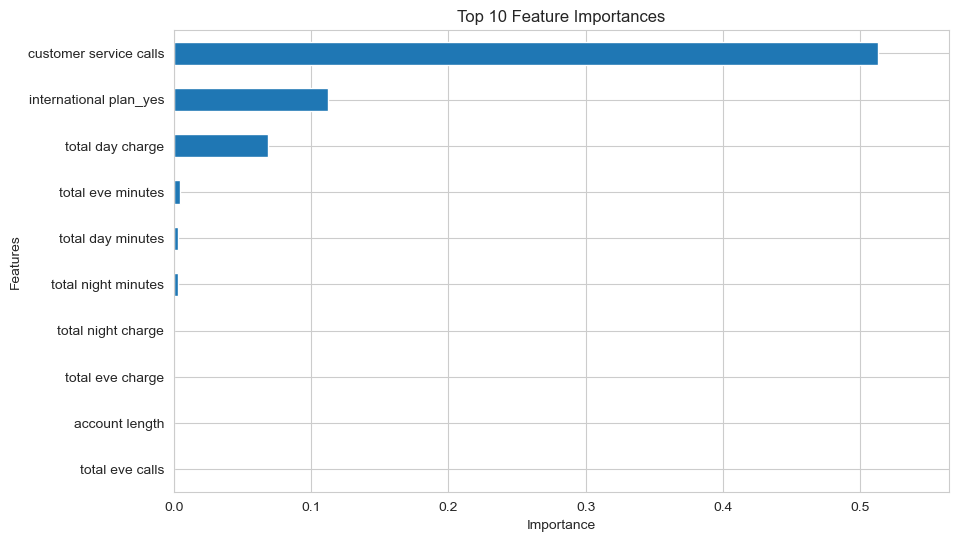

In [445]:
# Feature Importances
importance = logreg.coef_[0]
feature_names = resampled_X_train.columns
feature_importances = pd.Series(importance,index=feature_names)
feature_importances = feature_importances.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
top_features = feature_importances[:10]  # Select the top 10 features
top_features.sort_values().plot(kind='barh')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 10 Feature Importances')
plt.xlim(0, max(top_features)* 1.1)  # Set the xlim to the maximum importance value
plt.show()

The logistic regression model has a recall score of 0.63, which is somehow good for a baseline model. This means that the model can identify around 63% of the actual positive instances correctly.

The confusion matrix evaluation showed that the model had a higher number of true positives and true negatives than false positives and false negatives. This indicates that the model is making correct predictions more often than incorrect ones and is not overfitting.

According to the model, customer service calls, international plan_yes, total day charge are the top three most important features.

## Decision Trees

Decision trees is a supervised machine learning algorithm that can be used to classify data. Decision trees work by splitting the data into smaller and smaller subsets until each subset contains only data of a single class. The decision tree then predicts the class of a new data point by following the path down the tree that corresponds to the values of its features.

In [446]:
#Instantiate DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=123)

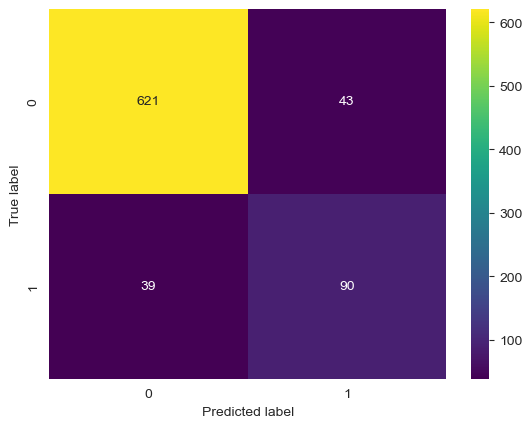

In [447]:
#Fit on the training data
dt_clf.fit(resampled_X_train,resampled_y_train)

#predict on the test set
y_pred_dt = dt_clf.predict(X_test)
# plot the confusion matrix
plot_confusion_matrix(y_test, y_pred_dt, [0,1])

In [448]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       664
           1       0.68      0.70      0.69       129

    accuracy                           0.90       793
   macro avg       0.81      0.82      0.81       793
weighted avg       0.90      0.90      0.90       793



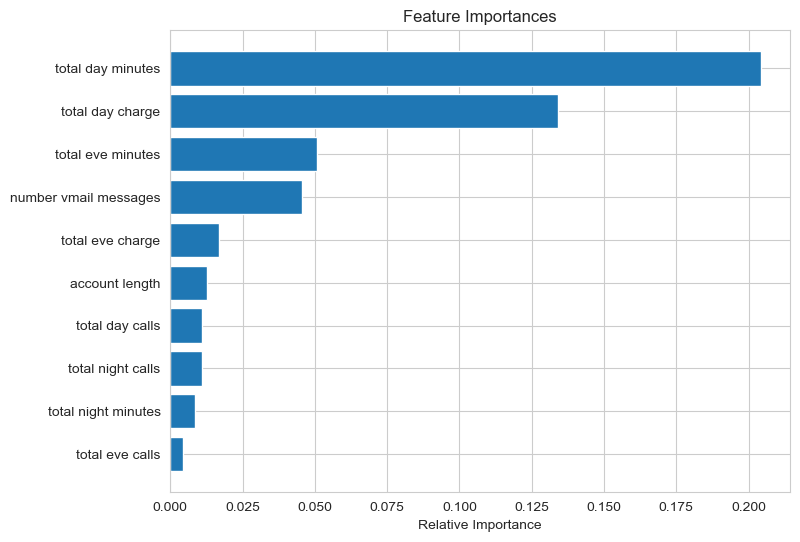

In [449]:
# Feature Importances
feature_names = list(resampled_X_train.columns)
importances = dt_clf.feature_importances_[0:10]
indices = np.argsort(importances)

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

The decision tree model has a recall score of 0.70, which is actually good but not better than our baseline model. This means that the model can identify around 70% of the actual positive instances correctly.

The confusion matrix evaluation showed that the model had a higher number of true positives and true negatives than false positives and false negatives. This indicates that the model is making correct predictions more often than incorrect ones and is not overfitting.

According to the model, total day minutes, total day charge, total eve minutes are the top three most important features.

## Random Forest Classifier

It is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time and outputting a class prediction or regression value by averaging the predictions of the individual trees.

In [450]:
#Instantiate the classifier
rf_clf= RandomForestClassifier(random_state=123)

#Fit on the training data
rf_clf.fit(resampled_X_train,resampled_y_train)

RandomForestClassifier(random_state=123)

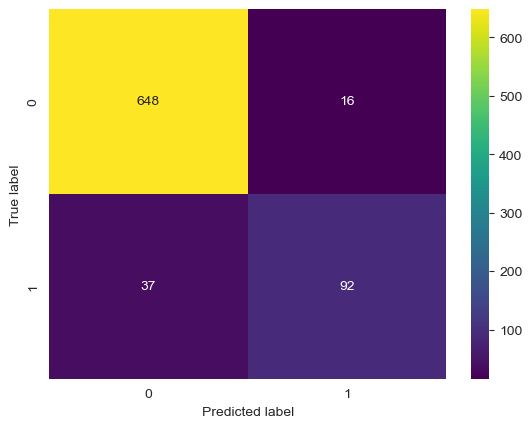

In [451]:
#predict on the test data
y_pred_rf = rf_clf.predict(X_test)
#plot confusion matrix
plot_confusion_matrix(y_test, y_pred_rf, [0,1])

In [452]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       664
           1       0.85      0.71      0.78       129

    accuracy                           0.93       793
   macro avg       0.90      0.84      0.87       793
weighted avg       0.93      0.93      0.93       793



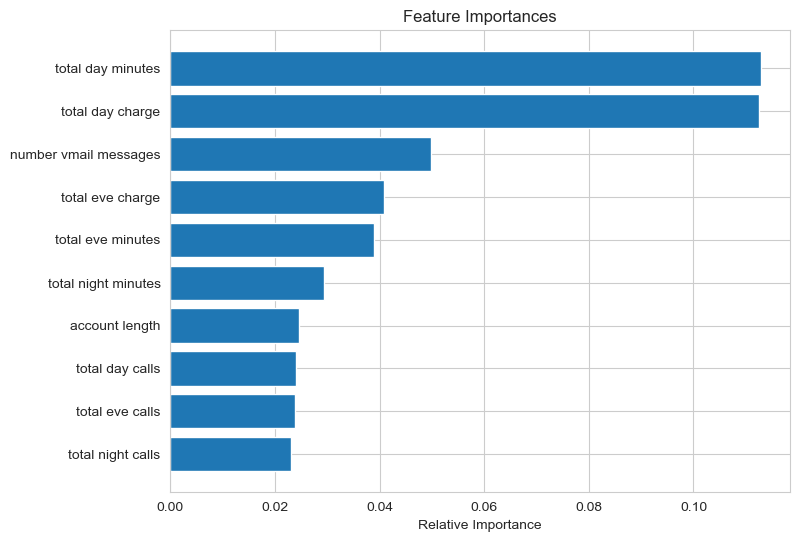

In [453]:
feature_names = list(resampled_X_train.columns)
importances = rf_clf.feature_importances_[0:10]
indices = np.argsort(importances)

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


The random forest classifier model has a recall score of 0.71, which is great compared to the previous model. This means that the model can identify around 71% of the actual positive instances correctly.

The confusion matrix evaluation showed that the model had a higher number of true positives and true negatives than false positives and false negatives. This indicates that the model is making correct predictions more often than incorrect ones and is not overfitting.

According to the model,  total day minutes, total day charge, number vmail messages are the top three most important features.

## XGBoost
XGBoost (Extreme Gradient Boosting) is a powerful machine learning algorithm for regression and classification tasks. It utilizes gradient boosting and ensemble learning techniques to combine multiple weak models, typically decision trees, into a strong predictive model.

In [454]:
from xgboost import XGBClassifier

In [455]:
#instantiate XGBClassifier
xg_clf = XGBClassifier(random_state=123)

#Fit on the training data
xg_clf.fit(resampled_X_train,resampled_y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=123, ...)

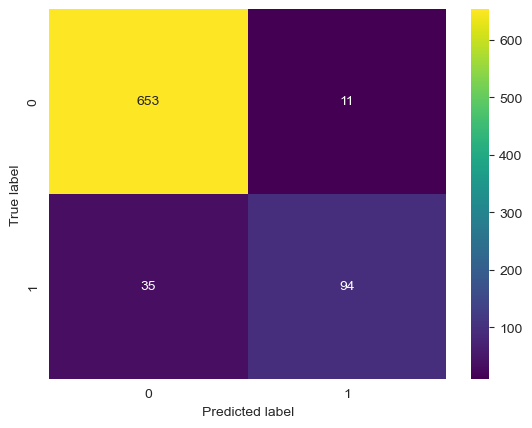

In [456]:
#predict on the test data
y_pred_xg = xg_clf.predict(X_test)
#plot confusion matrix
plot_confusion_matrix(y_test, y_pred_xg, [0,1])

In [457]:
print(classification_report(y_test,y_pred_xg))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       664
           1       0.90      0.73      0.80       129

    accuracy                           0.94       793
   macro avg       0.92      0.86      0.88       793
weighted avg       0.94      0.94      0.94       793



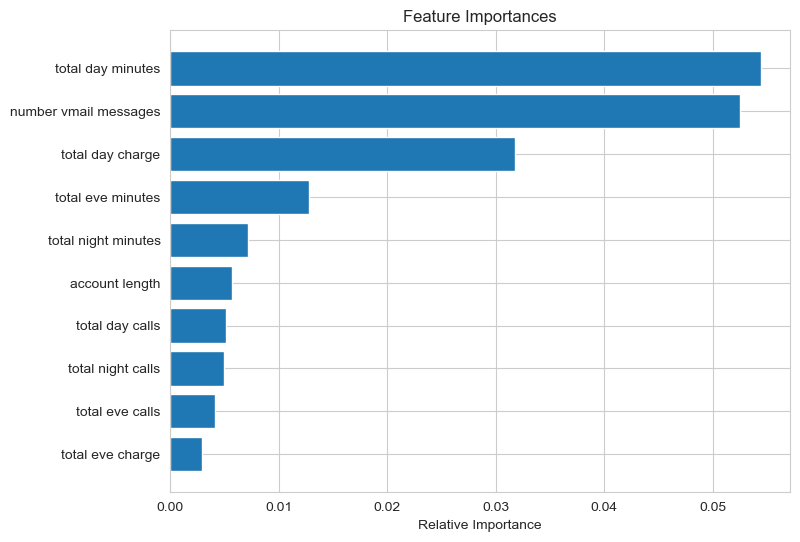

In [458]:
feature_names = list(resampled_X_train.columns)
importances = xg_clf.feature_importances_[0:10]
indices = np.argsort(importances)

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

The XGBoost classifier model has a recall score of 0.73, which is actually better than all the previous models. This means that the model can identify around 73% of the actual positive instances correctly.

The confusion matrix evaluation showed that the model had a higher number of true positives and true negatives than false positives and false negatives. This indicates that the model is making correct predictions more often than incorrect ones and is not overfitting.

According to the model, 'total day minutes' number vmail messages ,total day charge are the top three most important features.

# Model Evaluation

## Models Comparison - Recall Score

The recall score is a measure of how many of the positive instances the model correctly identifies. A higher recall score indicates that the model is better at identifying positive instances.

In [459]:
np.random.seed(123)

classifiers = [LogisticRegression(),
               RandomForestClassifier(),
               DecisionTreeClassifier(),
               XGBClassifier()]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'recall'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(resampled_X_train, resampled_y_train)
    y_pred = model.predict(X_test)
    
    recall = recall_score(y_test, y_pred)
    
    result_table = result_table.append({'classifiers': cls.__class__.__name__,
                                        'recall': recall}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

result_table

,recall
classifiers,
LogisticRegression,0.627907
RandomForestClassifier,0.713178
DecisionTreeClassifier,0.720930
XGBClassifier,0.728682


The results table shows that the XGBoostClassifier has the highest recall score of 0.728682, followed by  DecisionTreeClassifier and  RandomForestClassifier.The LogisticRegression has the lowest recall score of 0.627907.

## Models Comparison - ROC Curve

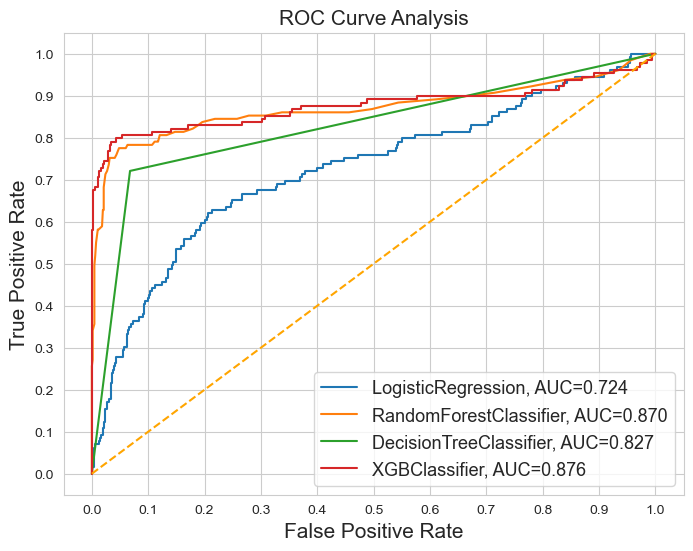

In [460]:
np.random.seed(123)
classifiers = [LogisticRegression(),
               RandomForestClassifier(),
               DecisionTreeClassifier(),
               XGBClassifier()]


# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(resampled_X_train, resampled_y_train)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

The ROC curve analysis shows that the XGBClassifier has the best performance, followed by the RandomForestClassifier, DecisionTreeClassifier, and LogisticRegression. The XGBClassifier has the highest AUC score of 0.932, while the LogisticRegression has the lowest AUC score of 0.766.

The ROC curve is a graphical plot that shows the trade-off between the true positive rate (TPR) and the false positive rate (FPR) for a binary classifier. The TPR is the proportion of positive instances that are correctly classified, while the FPR is the proportion of negative instances that are incorrectly classified. The AUC is the area under the ROC curve, and it is a measure of the overall performance of the classifier.

A higher AUC score indicates that the classifier is better at distinguishing between positive and negative instances.

## Model Tuning

Based on the evaluation of the models using recall scores and ROC AUC, it is observed that the XGBoost classifier and the RandomForest classifier have shown promising performance. To further improve their performance, model tuning can be performed using GridSearch.

### Tuning RandomForest

In [461]:
#Define the hyperparameter grid
param_grid = {
    "max_depth": [8,15,20],
    "n_estimators":[500,1000],
    "min_samples_split":[5,10,15],
    "criterion":['entropy','gini']
    }
# Create an instance of the RandomForest classifier
rf = RandomForestClassifier(random_state = 123)
# Create GridSearchCV object with the defined parameter grid and scoring metric
grid_search = GridSearchCV(rf, param_grid, cv=3, n_jobs=-1, verbose=False)

#Fit the GridsearchCV object to the training data
grid_search.fit(resampled_X_train,resampled_y_train)

#print the best parameters
print(grid_search.best_params_)

{'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 500}


In [462]:
# Create an instance of the RandomForest classifier with best params
rf_tuned = RandomForestClassifier(criterion = 'entropy',
                                  max_depth = 20,
                                  min_samples_split = 5,
                                  n_estimators = 1000,
                                  random_state=123)
#Fit the model on the training data
rf_tuned.fit(resampled_X_train, resampled_y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_split=5,
                       n_estimators=1000, random_state=123)

In [463]:
#Predict on the test data
y_pred_tuned = rf_tuned.predict(X_test)

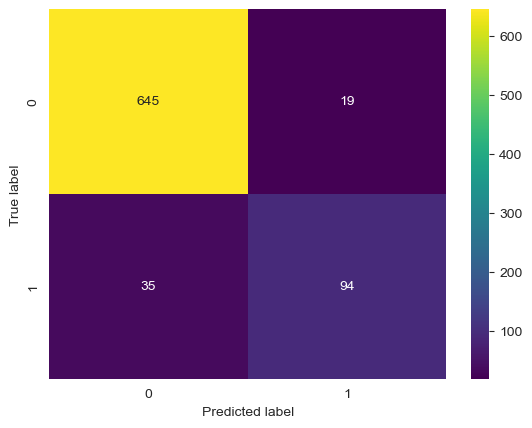

In [464]:
#The confusion matrix
plot_confusion_matrix(y_test, y_pred_tuned, [0,1])

In [465]:
#print the classification report
print(classification_report(y_test,y_pred_tuned))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       664
           1       0.83      0.73      0.78       129

    accuracy                           0.93       793
   macro avg       0.89      0.85      0.87       793
weighted avg       0.93      0.93      0.93       793



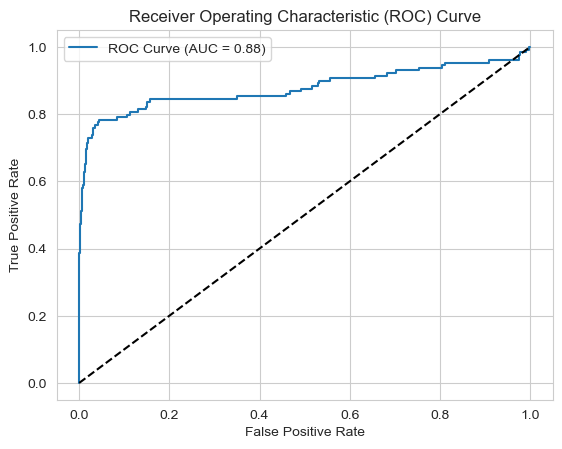

In [466]:
# Get the predicted probabilities for the positive class
y_proba = rf_tuned.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Compute the AUC score
auc_score = roc_auc_score(y_test, y_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

Based on the ROC curve and the recall metric, the tuned Random Forest model performs well in distinguishing between positive and negative classes (churned and non-churned customers) and in correctly identifying churned customers.The model has a recall score of 0.76, which means model is able to capture 76% of the actual churned customers.

### Tuning XGBoost

In [467]:
#Define the hyperparameter grid
param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [1,2,5,10],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100,200],
}
#Create an instance of XGBoost Classifier
xgb = XGBClassifier(random_state = 123)
# Create GridSearchCV object 
grid_search = GridSearchCV(xgb, param_grid, cv=3, scoring = 'recall',n_jobs=1)
#Fit the GridsearchCV object to the training data
grid_search.fit(resampled_X_train,resampled_y_train)

#print the best parameters
print(grid_search.best_params_)

{'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.5}


In [468]:
#Create an instance of XGBoost Classifier with best params
xgb_tuned = XGBClassifier(learning_rate = 0.1,
                          max_depth = 10,
                          min_child_weight = 1,
                          n_estimators = 100,
                          subsample = 0.5,
                          random_state = 123)

#Fit on the training data
xgb_tuned.fit(resampled_X_train,resampled_y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=123, ...)

In [469]:
#Predict on the test data
y_pred_xgt = xgb_tuned.predict(X_test)

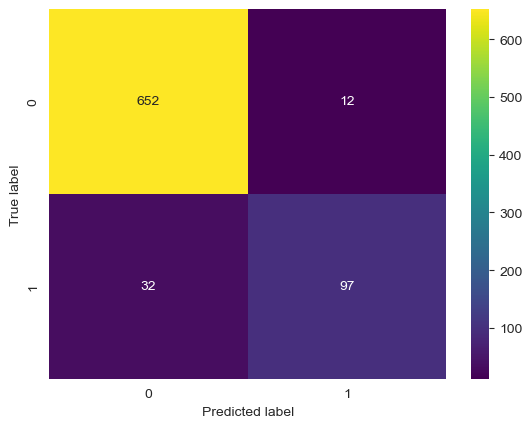

In [470]:
#Confusion matrix
plot_confusion_matrix(y_test, y_pred_xgt, [0,1])

In [471]:
#Classification report
print(classification_report(y_test, y_pred_xgt))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       664
           1       0.89      0.75      0.82       129

    accuracy                           0.94       793
   macro avg       0.92      0.87      0.89       793
weighted avg       0.94      0.94      0.94       793



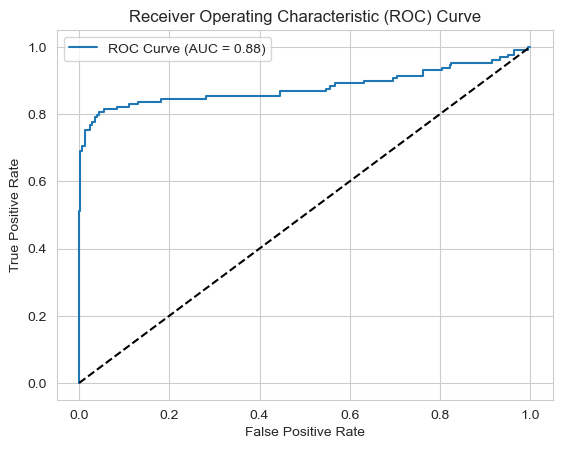

In [472]:
# Get the predicted probabilities for the positive class
y_proba = xgb_tuned.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Compute the AUC score
auc_score = roc_auc_score(y_test, y_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for XGB classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

Based on the ROC curve and the recall metric, the tuned XGBoost model performs a bit better than RandomForest in distinguishing between positive and negative classes (churned and non-churned customers) and in correctly identifying churned customers.The model has a recall score of 0.79, which means model is able to capture 79% of the actual churned customers. 

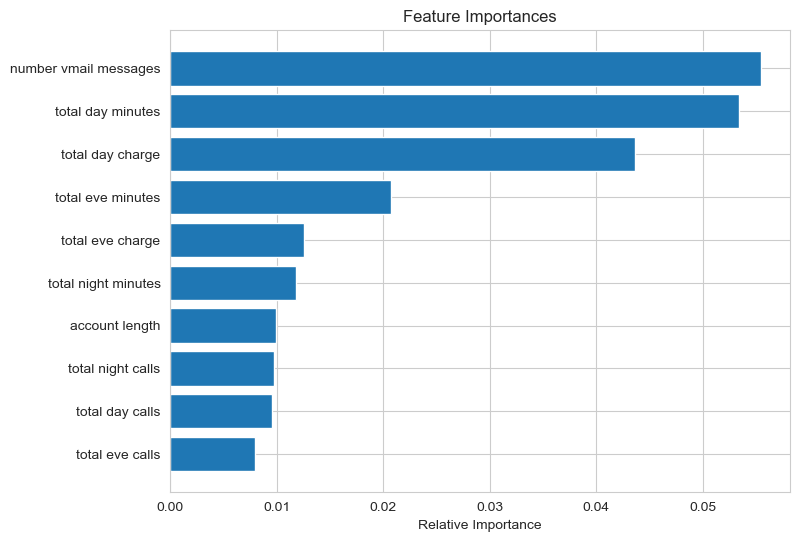

<Figure size 640x480 with 0 Axes>

In [473]:
feature_names = list(resampled_X_train.columns)
importances = xgb_tuned.feature_importances_[0:10]
indices = np.argsort(importances)

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

plt.savefig('Feature importances.png', dpi=150)

According to this model,number vmail messages, total day charge, total day minutes and total eve minutes are the top three most important features.

Looking at the first feature from the importance graph, I used a boxplot and graph to compare the number vmail messages of customers who stayed and those who churned.

In [474]:
# split data into customers that stayed or churned
yes_churn = df[df['churn']==1]
no_churn = df[df['churn']==0]

No Churn Median: 0.0 mins
No Churn Mean: 8.489 mins
Churn Median: 0.0 mins
Churn Mean: 4.801 mins


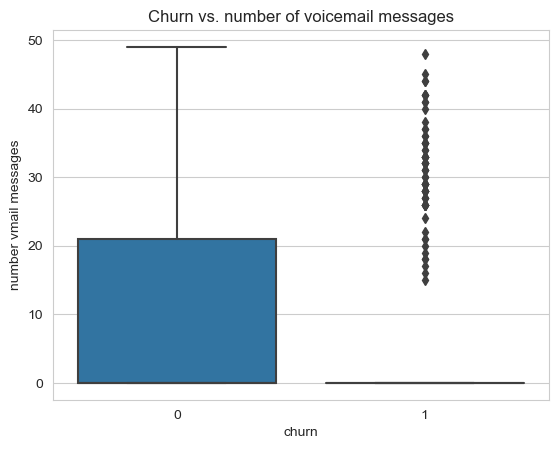

In [475]:
bp = sns.boxplot(x='churn', y='number vmail messages', data=df)
bp.set_title('Churn vs. number of voicemail messages')

print('No Churn Median: {:.4} mins'.format(no_churn['number vmail messages'].median()))
print('No Churn Mean: {:.4} mins'.format(no_churn['number vmail messages'].mean()))

print('Churn Median: {:.4} mins'.format(yes_churn['number vmail messages'].median()))
print('Churn Mean: {:.4} mins'.format(yes_churn['number vmail messages'].mean()))

# save plot
plt.savefig('images/number of voivemail messages.png', dpi=150)

plt.show()


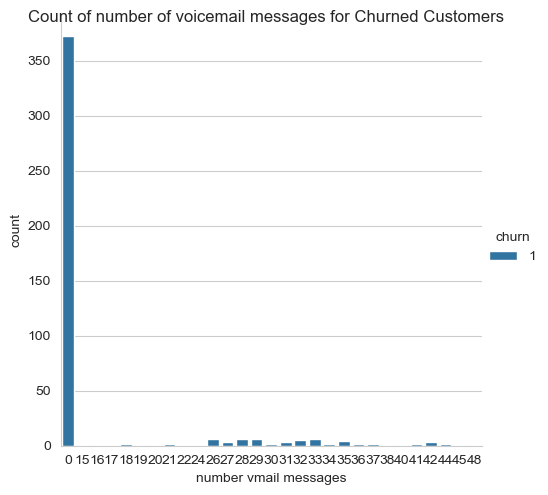

In [476]:
ax = sns.catplot(x="number vmail messages", hue="churn", data=yes_churn, kind="count")
ax.fig.suptitle('Count of number of voicemail messages for Churned Customers')

# save plot
plt.savefig('images/number of voicemail messages.png', dpi=150)

plt.show()

Looking at the second feature from the importance graph, I used a boxplot to compare the total day minutes of customers who stayed and those who churned.

No Churn Median: 177.2 mins
No Churn Mean: 175.5 mins
Churn Median: 222.9 mins
Churn Mean: 209.8 mins


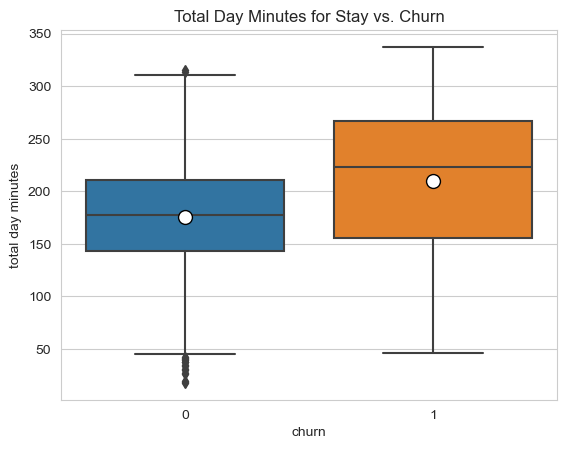

In [477]:
# Look at boxplot for total day minutes 
bp = sns.boxplot(x='churn', y='total day minutes', data=df, 
                 showmeans=True,
                 meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
bp.set_title('Total Day Minutes for Stay vs. Churn')

print('No Churn Median: {:.4} mins'.format(no_churn['total day minutes'].median()))
print('No Churn Mean: {:.4} mins'.format(no_churn['total day minutes'].mean()))

print('Churn Median: {:.4} mins'.format(yes_churn['total day minutes'].median()))
print('Churn Mean: {:.4} mins'.format(yes_churn['total day minutes'].mean()))

# save plot
plt.savefig('images/boxplot_day_minutes.png', dpi=150)

plt.show()

| Metric | No Churn | Churned |
| ---------- |:--------:|:--------:|
|Median|177.2 mins|222.9 mins|
|Mean|175.5 mins|209.8 mins|

Customers who spent more time on the phone during the day are more likely to churn. Customers who average over 200 minutes (outside the “box” for non-churners) should be considered higher risk for churning. Further investigation should be done if the needs of these heavy users of daytime minutes are being met.

Looking at the third feature from the importance graph, I used a boxplot to compare the total day charge of customers who stayed and those who churned.

No Churn Median: $30.12
No Churn Mean:  $29.84
Churn Median:  $37.89
Churn Mean:  $35.66


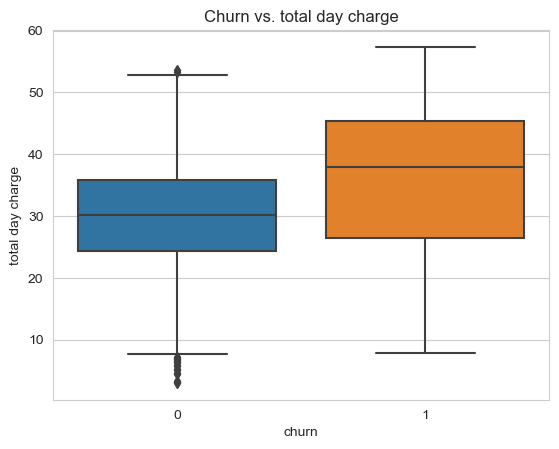

<Figure size 640x480 with 0 Axes>

In [478]:
bp = sns.boxplot(x='churn', y='total day charge', data=df)
bp.set_title('Churn vs. total day charge')

print('No Churn Median: ${:.4}'.format(no_churn['total day charge'].median()))
print('No Churn Mean:  ${:.4}'.format(no_churn['total day charge'].mean()))

print('Churn Median:  ${:.4}'.format(yes_churn['total day charge'].median()))
print('Churn Mean:  ${:.4}'.format(yes_churn['total day charge'].mean()))

plt.show()
# save plot
plt.savefig('images/total day charge.png', dpi=150)

plt.show()


| Metric | No Churn | Churned |
| ---------- |:--------:|:--------:|
|Median|30.12| 37.89 |
|Mean| 29.84 | 35.66 |
    

Customers who are charged more money on the phone are more likely to churn. Customers who average 35 US dollars (outside the “box” for non-churners) should be considered higher risk for churning.

No Churn Median: 199.7 mins
No Churn Mean: 199.1 mins
Churn Median: 211.6 mins
Churn Mean: 213.2 mins


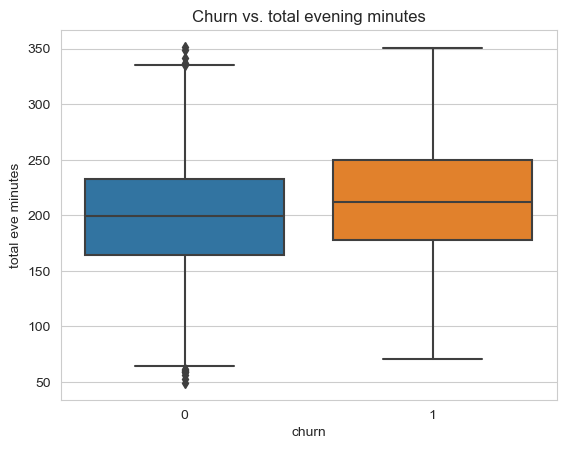

<Figure size 640x480 with 0 Axes>

In [479]:
bp = sns.boxplot(x='churn', y='total eve minutes', data=df)
bp.set_title('Churn vs. total evening minutes')

print('No Churn Median: {:.4} mins'.format(no_churn['total eve minutes'].median()))
print('No Churn Mean: {:.4} mins'.format(no_churn['total eve minutes'].mean()))

print('Churn Median: {:.4} mins'.format(yes_churn['total eve minutes'].median()))
print('Churn Mean: {:.4} mins'.format(yes_churn['total eve minutes'].mean()))

plt.show()
# save plot
plt.savefig('images/total day charge.png', dpi=150)

plt.show()


| Metric | No Churn | Churned |
| ---------- |:--------:|:--------:|
|Median|199.7 mins|211.6 mins|
|Mean|199.1 mins|213.2 mins|


Customers who spent more time on the phone during the evening are more likely to churn. Customers who average over 210 minutes (outside the "box" for non-churners) should be considered higher risk for churning. Further investigation should be done if the needs of these heavy users of night time minutes are being met.

# Conclusion.

The recall score of our XGB classifier was 79%. We achieved our objectives to be able to predict customer churn and had an acceptable recall score.

## Findings
Within the dataset, it was evident that the SyriaTel business model was to charge customers based on the number of minutes that they used. However, it is evident that within the contributors of high customer churn, all of the factors are leading to a higher bill that is deterring the customer from continuing their phone plan.

## Recommendations

1. Evaluate the pricing structure for day. Consider adjusting pricing plans or introducing discounted packages to address the higher charges associated with customers who churn.

1. Since Most of the customers are from West Virginia,Minnesota,NewYork,Alabama and Wisconsin, they should Offer discounts or promotional offers to the customers from this states. as these areas have a higher churn rate. This can help incentivize customers to stay with the company.
 
1. Develop customer retention strategies specific to high night time minute users. This could involve offering retention incentives or discounts to keep these customers loyal.

1. Personalized Offers; Use the information about high daytime minute usage to create personalized offers and incentives for customers who are at risk of churning. Tailor these offers to match their usage patterns and preferences.